# Análise de texto de fontes desestruturadas e Web

## Aula 02 - PDFs

Nesta aula iremos trabalhar com extração de informações a partir de PDFs utilizando bibliotecas do Python.

## O que são arquivos PDF?

O PDF, ou *Portable Document Format*, é um formato de arquivo criado pela Adobe em 1993. O principal objetivo em utilizar um PDF envolve permitir que um documento seja lido de forma independente do hardware ou sistema operacional utilizado pelo usuário. Também, sem a necessidade de possuir instalado o programa utilizado para criar o documento.

<img src="https://atd-insper.s3.us-east-2.amazonaws.com/aula02/pdf_adobe.jpg">

Documentos PDF são padronizados conforme a ISO 32000. Os arquivos PDF geralmente incluem:
- informações textuais
- imagens vetoriais
- imagens bitmap

Eles são distribuídos principalmente com foco em leitura, ou seja, ao criar um DOC no Microsoft Word, repassamos o `arquivo.DOCX` para pessoas que necessitem editá-lo.

Para as pessoas que apenas necessitam ler as informações do documento, transformamos o DOC em PDF e enviamos neste formato!


## Qual a importância de extrair informações de PDFs?

Arquivos PDF são criados com foco principal sendo a interação entre organizações e pessoas (uma cria, a outra lê).

Em um cenário ideal, as informações contidas no PDF também estariam disponíveis em um ambiente estruturado e de fácil recuperação (ex: sistema de gerenciamento de banco de dados). Entretanto, muitas vezes a única forma disponível para acessos aos dados é o próprio arquivo PDF, por exemplo: editais, relatórios governamentais, lista de lojas, relatórios de desempenho, etc.

Nesta aula, iremos aprender como extrair informações de PDFs, tabulares ou não. Além disso, veremos como utilizar recursos do Python para armazenar e analisar estes dados.

## Biblioteca *camelot*
Para os dados tabulares, a principal biblioteca que utilizaremos será a camelot (https://camelot-py.readthedocs.io/en/master/).
Para utilizá-la, será necessário instalar algumas dependências. Como você está utilizando o **Google Colab**, execute os seguintes comandos (execute esta célula):

In [1]:
!pip install ghostscript
!pip install camelot-py[cv]
!pip install excalibur-py
!pip install 'PyPDF2<3.0'
!apt install ghostscript python3-tk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.0/284.0 kB 24.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of camelot-py[cv] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.0/422.0 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.4/327.4 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Lembra-se de executar o import novamente quando instalar bibliotecas!

## Importando as bibliotecas necessárias

Aqui, iremos importar as bibliotecas que utilizaremos na aula

In [2]:
import os
import pandas as pd
import numpy as np
import camelot
import missingno as mn
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

Caso obtenha algum erro, utilize o **!pip install** para instalar a biblioteca ausente!

In [ ]:
# Exemplo (remover # da proxima linha se preciso)
# !pip install missingno

Vamos conferir em qual diretório estamos executando o notebook?

In [3]:
print('O seu notebook está no diretório')
print(os.getcwd())

O seu notebook está no diretório
/content



## Lendo um PDF

Para realizar a leitura dos dados tabulares, vamos utilizar a biblioteca **camelot**:

In [4]:
pdf_path = 'https://atd-insper.s3.us-east-2.amazonaws.com/aula02/stores.pdf'
tabelas = camelot.read_pdf(pdf_path)
tabelas

<TableList n=1>

Podemos ver que encontramos uma tabela no documento.

Agora, vamos conferir o *parsing report* do *camelot* para esta tabela:

In [5]:
print(tabelas[0].parsing_report)

{'accuracy': 100.0, 'whitespace': 8.17, 'order': 1, 'page': 1}


E podemos obter um *DataFrame* do *pandas* com os dados desta tabela:

Depois iremos aprender o que mais podemos fazer com este DataFrame!

In [6]:
df = tabelas[0].df
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil,LojaCentro
1,L01,Eletrônicos,São Paulo,"9,893.24",20,"12,942.78",16.50,3.91,0,1,1,
2,L02,Acessórios,São Paulo,"4,048.26",16,"7,095.50",145.92,10.69,0,1,4,
3,L03,Games e Info,São Paulo,"5,035.14",10,"6,602.59",25.53,4.46,1,1,3,
4,L04,Games e Info,São Paulo,"5,001.69",6,"3,455.80",13.77,6.30,1,0,4,
5,L05,Games e Info,São Paulo,"4,953.57",6,"3,515.88",13.87,2.09,0,0,1,
6,L06,Acessórios,São Paulo,"3,982.36",11,"4,009.59",80.24,5.82,1,0,4,
7,L07,Acessórios,São Paulo,"3,918.66",3,"4,041.81",73.04,2.05,0,0,4,
8,L08,Eletrônicos,São Paulo,"9,987.32",25,"9,948.98",12.29,0.35,1,0,3,
9,L09,Eletrônicos,Rio de Janeiro,"9,530.83",22,"8,963.34",11.17,5.48,1,0,4,


A funcionalidade de *read_pdf* do *camelot* permite especificar diversos parâmetros. Por exemplo, podemos ler apenas a página 2:

In [7]:
pdf_path = 'https://atd-insper.s3.us-east-2.amazonaws.com/aula02/stores.pdf'
tabelas = camelot.read_pdf(pdf_path, pages = '2')
df_pg2 = tabelas[0].df
df_pg2

,0,1,2,3,4,5,6,7,8,9,10,11
0,L52,Eletrônicos,São Paulo,"10,002.37",30,"12,990.53",16.43,7.13,0,1,4,
1,L53,Eletrônicos,São Paulo,"10,129.94",24,"10,003.34",12.74,5.14,1,0,2,
2,L54,Acessórios,Rio de Janeiro,"3,458.45",8,"3,032.39",57.07,6.18,0,0,3,
3,L55,Games e Info,Rio de Janeiro,"4,533.89",10,"5,488.57",20.66,6.03,1,1,2,
4,L56,Games e Info,Rio de Janeiro,"4,549.74",7,"5,552.39",21.21,7.16,0,1,4,
5,L57,Games e Info,Brasília,"4,035.74",7,"5,983.45",22.36,9.14,1,1,3,
6,L58,Acessórios,Brasília,"3,020.23",12,"6,517.81",106.02,5.12,0,1,4,
7,L59,Games e Info,Brasília,"4,001.21",4,"3,001.76",11.36,6.18,1,0,4,
8,L60,Acessórios,São Paulo,"3,970.48",17,"7,144.34",105.23,2.08,0,1,3,
9,L61,Games e Info,São Paulo,"5,025.78",11,"6,440.72",25.55,7.27,1,1,4,


# Múltiplas tabelas em um mesmo arquivo

Imagem de exemplo com múltiplas tabelas em uma mesma página:
<img src="https://atd-insper.s3.us-east-2.amazonaws.com/aula02/relatorio_aula02.png">

In [8]:
pdf_path = 'https://atd-insper.s3.us-east-2.amazonaws.com/aula02/relatorio.pdf'
tab_rep = camelot.read_pdf(pdf_path)
tab_rep

<TableList n=2>

Podemos perceber que foram encontradas duas tabelas no arquivo.

In [9]:
df_relat1 = tab_rep[0].df
df_relat1

,0,1,2,3
0,,Jan,Fev,Mar
1,Loja 1,5501,6031,7212
2,Loja 2,8007,8052,7301
3,Loja 3,6001,5041,8327


In [10]:
df_relat2 = tab_rep[1].df
df_relat2

,0,1,2,3,4
0,Vendedor,Loja,Jan,Fev,Mar
1,João S.,Loja 1,5501,6031,7212
2,Igor M.,Loja 2,8007,8052,7301
3,Celso T.,Loja 3,6001,5041,8327
4,Ana S.,Loja 1,5501,6031,7212
5,Tiago B.,Loja 2,8007,8052,7301
6,Helena W.,Loja 3,6001,5041,8327
7,José K.,Loja 1,5501,6031,7212
8,Bruna D.,Loja 2,8007,8052,7301
9,Vinicius G.,Loja 3,6001,5041,8327


Utilizando o report gráfico para analisar as extrações:

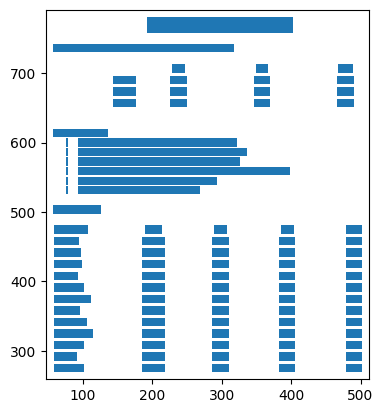

In [11]:
camelot.plot(tab_rep[1], kind='text').show()

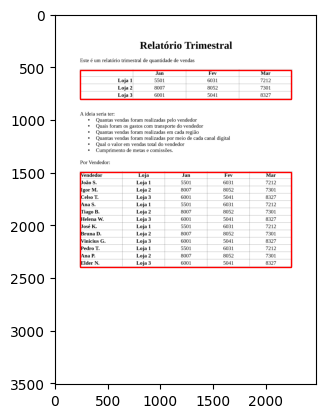

In [12]:
camelot.plot(tab_rep[0], kind='contour').show()

## Primeiro contato com o *pandas*

Agora, vamos aprender como utilizar recursos da biblioteca *pandas*.

In [13]:
pdf_path = 'https://atd-insper.s3.us-east-2.amazonaws.com/aula02/stores.pdf'
tabelas = camelot.read_pdf(pdf_path, split_text=True, pages='1-end')
tabelas

<TableList n=2>

In [14]:
type(tabelas[0].df)

pandas.core.frame.DataFrame

Iremos concatenar dois DataFrames:

In [19]:
# Seu código aqui
df0 = tabelas[0].df
df1 = tabelas[1].df

df_all = pd.concat([df0, df1], axis=0)
df_all

,0,1,2,3,4,5,6,7,8,9,10,11
0,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil,LojaCentro
1,L01,Eletrônicos,São Paulo,"9,893.24",20,"12,942.78",16.50,3.91,0,1,1,
2,L02,Acessórios,São Paulo,"4,048.26",16,"7,095.50",145.92,10.69,0,1,4,
3,L03,Games e Info,São Paulo,"5,035.14",10,"6,602.59",25.53,4.46,1,1,3,
4,L04,Games e Info,São Paulo,"5,001.69",6,"3,455.80",13.77,6.30,1,0,4,
...,...,...,...,...,...,...,...,...,...,...,...,...
35,L87,Acessórios,Rio de Janeiro,"3,539.74",15,"6,003.37",133.35,0.51,1,1,4,
36,L88,Eletrônicos,Rio de Janeiro,"9,548.37",19,"11,953.24",14.84,10.90,1,1,4,
37,L89,Eletrônicos,Rio de Janeiro,"9,502.63",26,"12,057.17",14.91,8.05,0,1,3,
38,L90,Games e Info,São Paulo,"4,923.23",11,"6,471.47",24.48,3.64,0,1,4,


podemos exibir apenas o início do nosso DataFrame, para não ter a tela toda poluída com dados

In [20]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil,LojaCentro
1,L01,Eletrônicos,São Paulo,"9,893.24",20,"12,942.78",16.50,3.91,0,1,1,
2,L02,Acessórios,São Paulo,"4,048.26",16,"7,095.50",145.92,10.69,0,1,4,
3,L03,Games e Info,São Paulo,"5,035.14",10,"6,602.59",25.53,4.46,1,1,3,
4,L04,Games e Info,São Paulo,"5,001.69",6,"3,455.80",13.77,6.30,1,0,4,


ou os últimos:

In [21]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11
47,L47,Acessórios,Brasília,"2,996.18",8,"3,501.24",64.26,0.12,1,0,4,
48,L48,Eletrônicos,Brasília,"8,996.01",17,"9,522.54",11.58,2.97,1,0,4,
49,L49,Games e Info,Belo Horizonte,"4,001.27",5,"1,981.24",7.57,6.59,1,0,4,
50,L50,Acessórios,Belo Horizonte,"3,042.01",9,"5,483.42",110.27,2.79,0,1,2,
51,L51,Acessórios,Belo Horizonte,"3,026.23",14,"5,505.55",105.27,4.94,0,1,1,


é possível também especificar o número de linhas

In [22]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11
0,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil,LojaCentro
1,L01,Eletrônicos,São Paulo,"9,893.24",20,"12,942.78",16.50,3.91,0,1,1,


Perceberam que o nome das colunas ficou na primeira linha?

Vamos renomear as colunas do DataFrame:

In [23]:
df.columns = ['CodLoja', 'TipoLoja', 'Cidade', 'CustoOperacional','NumFunc', 'FatDia',
              'NumClientesDia', 'CustoAquiPorCli', 'LojaPropria', 'VendeOnline', 'Perfil', 'LojaCentro']
df.head(3)

,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil,LojaCentro
0,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil,LojaCentro
1,L01,Eletrônicos,São Paulo,"9,893.24",20,"12,942.78",16.50,3.91,0,1,1,
2,L02,Acessórios,São Paulo,"4,048.26",16,"7,095.50",145.92,10.69,0,1,4,


e agora vamos remover a primeira linha

In [24]:
# Comando para remover a primeira linha aqui
df.drop(0, axis=0, inplace=True)

df.head(3)

,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil,LojaCentro
1,L01,Eletrônicos,São Paulo,"9,893.24",20,"12,942.78",16.50,3.91,0,1,1,
2,L02,Acessórios,São Paulo,"4,048.26",16,"7,095.50",145.92,10.69,0,1,4,
3,L03,Games e Info,São Paulo,"5,035.14",10,"6,602.59",25.53,4.46,1,1,3,


Agora, vamos conferir os tipos de dados das colunas.

In [25]:
df.dtypes

CodLoja             object
TipoLoja            object
Cidade              object
CustoOperacional    object
NumFunc             object
FatDia              object
NumClientesDia      object
CustoAquiPorCli     object
LojaPropria         object
VendeOnline         object
Perfil              object
LojaCentro          object
dtype: object

Vamos alterar as colunas numéricas:

In [ ]:
df

In [26]:
df['CustoOperacional'] = df['CustoOperacional'].str.replace(',','').astype(float)
df['NumFunc'] = df['NumFunc'].astype(int)
df['FatDia'] = df['FatDia'].str.replace(',','').astype(float)
df['NumClientesDia'] = df['NumClientesDia'].astype(float)
df['CustoAquiPorCli'] = df['CustoAquiPorCli'].astype(float)

In [27]:
df.dtypes

CodLoja              object
TipoLoja             object
Cidade               object
CustoOperacional    float64
NumFunc               int64
FatDia              float64
NumClientesDia      float64
CustoAquiPorCli     float64
LojaPropria          object
VendeOnline          object
Perfil               object
LojaCentro           object
dtype: object

Agora, vamos definir as variáveis categóricas:

In [28]:
df['TipoLoja'] = df['TipoLoja'].astype('category')
df['Cidade'] = df['Cidade'].astype('category')

df['LojaPropria'] = df['LojaPropria'].astype('category')
df['VendeOnline'] = df['VendeOnline'].astype('category')
df['Perfil'] = df['Perfil'].astype('category')
df['LojaCentro'] = df['LojaCentro'].astype('category')

Assim, os tipos ficam:

In [29]:
df.dtypes

CodLoja               object
TipoLoja            category
Cidade              category
CustoOperacional     float64
NumFunc                int64
FatDia               float64
NumClientesDia       float64
CustoAquiPorCli      float64
LojaPropria         category
VendeOnline         category
Perfil              category
LojaCentro          category
dtype: object

O que temos até agora?!

In [30]:
df.head(2)

,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil,LojaCentro
1,L01,Eletrônicos,São Paulo,9893.24,20,12942.78,16.50,3.91,0,1,1,
2,L02,Acessórios,São Paulo,4048.26,16,7095.50,145.92,10.69,0,1,4,


Quantas linhas (registros) e colunas?

In [ ]:
df.shape

### Filtrando dados
Vamos aprender como selecionar apenas parte dos registros?

Vamos selecionar apenas as lojas da cidade de São Paulo:

In [ ]:
# Seu código aqui

Agora, selecione apenas as lojas de Acessórios:

In [ ]:
df.loc[df['TipoLoja'] == 'Acessórios']

Vamos trazer apenas as colunas TipoLoja e FatDia da cidade de São Paulo:

In [ ]:
filtro_linhas = df['Cidade'] == 'São Paulo'
df.loc[filtro_linhas, ['TipoLoja', 'FatDia']]

Agora, apenas as lojas com faturamento diário acima de 12.000,00:

In [ ]:
df.loc[df['FatDia'] > 12000]

E as lojas de Acessórios que vendem até  3000?

**Atenção!** Se está filtrando por duas colunas, sempre utilize parênteses para envolver os critérios `( ) & ( )`

In [ ]:
df.loc[(df['FatDia'] <= 3000) & (df['TipoLoja'] == 'Acessórios')]

E somente as colunas Cidade e CustoOperacional, mas mantendo todas as linhas?

In [ ]:
df.loc[:, ['Cidade', 'CustoOperacional']]

## Análise exploratória

Agora, vamos utilizar alguns recursos de estatística e bibliotecas de visualização para conhecermos um pouco melhor os nossos dados.

### Verificando *missing values*

É comum que as bases tenham valores faltantes. Vamos conferir se alguma coluna possui valores faltantes:

In [32]:
df

,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil,LojaCentro
1,L01,Eletrônicos,São Paulo,9893.24,20,12942.78,16.50,3.91,0,1,1,
2,L02,Acessórios,São Paulo,4048.26,16,7095.50,145.92,10.69,0,1,4,
3,L03,Games e Info,São Paulo,5035.14,10,6602.59,25.53,4.46,1,1,3,
4,L04,Games e Info,São Paulo,5001.69,6,3455.80,13.77,6.30,1,0,4,
5,L05,Games e Info,São Paulo,4953.57,6,3515.88,13.87,2.09,0,0,1,
6,L06,Acessórios,São Paulo,3982.36,11,4009.59,80.24,5.82,1,0,4,
7,L07,Acessórios,São Paulo,3918.66,3,4041.81,73.04,2.05,0,0,4,
8,L08,Eletrônicos,São Paulo,9987.32,25,9948.98,12.29,0.35,1,0,3,
9,L09,Eletrônicos,Rio de Janeiro,9530.83,22,8963.34,11.17,5.48,1,0,4,
10,L10,Acessórios,Rio de Janeiro,3595.69,15,3046.12,59.34,3.98,1,0,1,


Existe toda uma literatura e técnicas que podem ser utilizadas em *missing imputation*.

Primeiro, vamos conferir se eles existem:

In [33]:
df.isna().sum()

CodLoja             0
TipoLoja            0
Cidade              0
CustoOperacional    0
NumFunc             0
FatDia              0
NumClientesDia      0
CustoAquiPorCli     0
LojaPropria         0
VendeOnline         0
Perfil              0
LojaCentro          0
dtype: int64

Estranho, não?

Consegue identificar por que isto acontece?

R:

Vamos substituir as strings vazias por NaN (not a number)

In [34]:
df.replace('', np.nan, inplace=True)

In [ ]:
df.dtypes

E contar os missings novamente:

In [35]:
df.isna().sum()

CodLoja              0
TipoLoja             0
Cidade               0
CustoOperacional     0
NumFunc              0
FatDia               0
NumClientesDia       0
CustoAquiPorCli      0
LojaPropria          0
VendeOnline          3
Perfil               0
LojaCentro          48
dtype: int64

Vamos utilizar a biblioteca *missingno* para produzir algo mais visual?!

<Axes: >

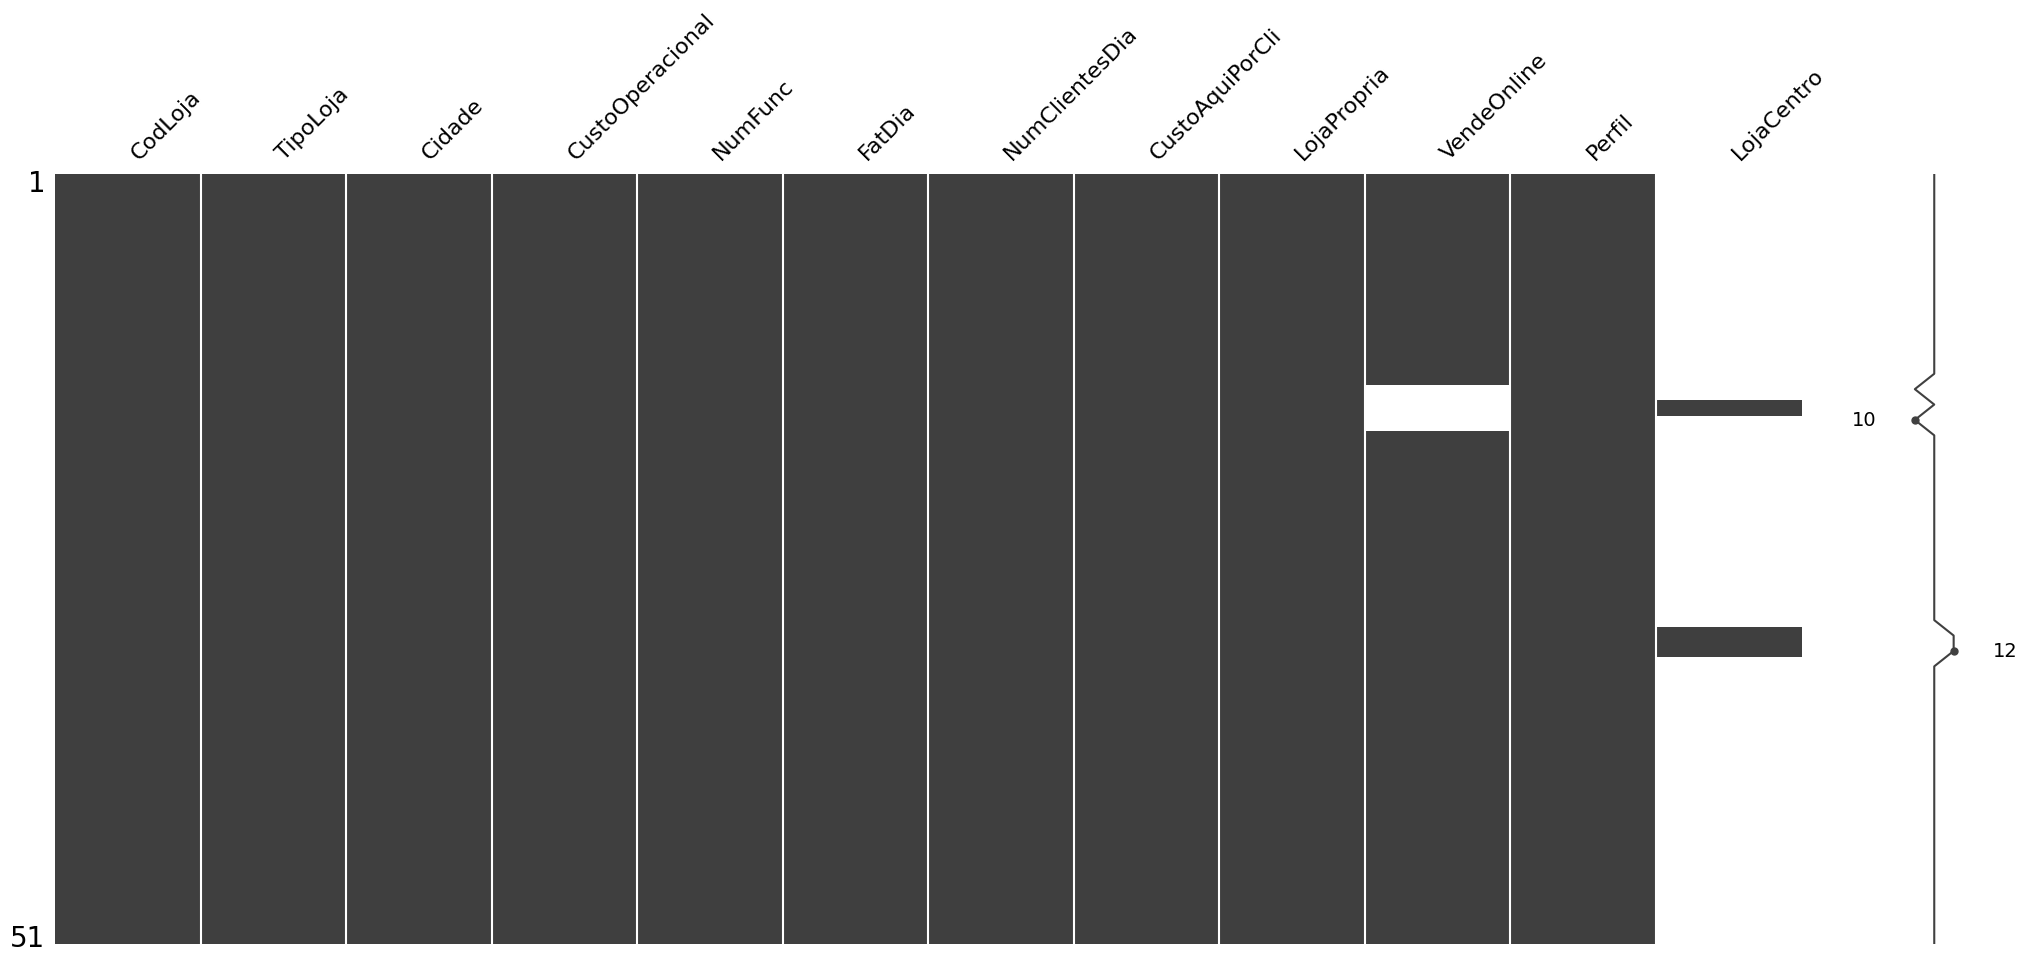

In [36]:
mn.matrix(df)

Quais colunas possuem missings?

R:

Como podemos corrigir?!

R:

Vamos remover de nossa análise a última coluna:

In [ ]:
# Seu código aqui
df.head()

E arbitrariamente preencher os missings em VendeOnline com 1:

In [ ]:
df.loc[df['VendeOnline'].isna(), 'VendeOnline'] = '1'

Conferindo os missings novamente:

In [ ]:
mn.matrix(df)

### Ordenando os dados

Como conseguimos ordenar os dados?

In [ ]:
df.sort_values(by='Cidade')

Será que conseguimos ordenar pelo faturamento em ordem crescente?

In [ ]:
df.sort_values(by='FatDia', ascending=True)

Será que conseguimos ordenar pelo faturamento em ordem decrescente?

In [ ]:
df.sort_values(by='FatDia', ascending=False)

### Criando tabelas de frequência

Conseguimos contar as ocorrências? Por exemplo, e se quiséssemos saber quantas lojas existem em cada cidade?

In [ ]:
df['Cidade'].value_counts()

E se quisessemos saber a porcentagem de lojas em cada cidade?

In [ ]:
df['Cidade'].value_counts(normalize=True)

**Exercício 1** Qual a porcentagem de lojas que são de Eletrônicos?

**Exercício 2** Considerando apenas São Paulo, qual a porcentagem de lojas que são de Eletrônicos?

Podemos exibir a tabela de frequências de forma gráfica?

In [ ]:
cont = df['Cidade'].value_counts(normalize=True)
cont.plot.bar()

In [ ]:
cont

In [ ]:
cont.reset_index()

In [ ]:
dados = cont.reset_index()

px.bar(dados, x='index', y='Cidade',
       color='index', labels={'index': 'Cidade'},
       title='Freq. Loja por Cidade')

### Medidas Resumo

E se quiséssemos saber a média de faturamento por dia?

In [ ]:
df['FatDia'].mean()

E os valores máximo, mínimo e mediana?!

In [ ]:
df['FatDia'].max()

In [ ]:
df['FatDia'].min()

In [ ]:
df['FatDia'].median()

Podemos resumir estas estatísticas em um único comando:

In [ ]:
df.describe()

### Distribuição

Faz sentido realizar uma contagem na variável de Faturamento?

Podemos analisar a distribuição.

In [ ]:
df['FatDia'].plot.hist()

In [ ]:
df['FatDia'].plot.hist(bins=8)

In [ ]:
px.histogram(df['FatDia'],
             labels={'value': 'Faturamento'},
             title = 'Distribuição do faturamento')

In [ ]:
df_hist = df.loc[:, ['TipoLoja', 'FatDia']]

px.histogram(df_hist, x = 'FatDia',
             color='TipoLoja', opacity=0.75)

E como plotar diversos gráficos na mesma célula?

In [ ]:
fig = plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
df['FatDia'].plot.hist()
plt.title('Faturamento Dia')

plt.subplot(2, 2, 2)
df['CustoOperacional'].plot.hist()
plt.title('Custo Operacional')

plt.subplot(2, 2, 3)
df['NumClientesDia'].plot.hist()
plt.title('Média Cliente por Dia')

plt.subplot(2, 2, 4)
df['CustoAquiPorCli'].plot.hist()
plt.title('Custo médio Aquisição de Clientes')

plt.tight_layout()
plt.show()



### Agrupamentos

Como podemos descobrir o Faturamento médio?

In [ ]:
df['FatDia'].mean()

E para descobrir o faturamento médio por Tipo de Loja?

In [ ]:
group_df =  df.groupby(by='TipoLoja')['FatDia'].mean()
group_df

In [ ]:
fig = plt.figure(figsize=(8, 4))
group_df.plot.bar()
plt.title('Faturamento médio porb Tipo de Loja')
plt.show()

**Exercício 3** Descubra o custo médio de aquisição de cliente para lojas que vendem e não vendem online.

**Exercício 4** Descubra o faturamento médio para lojas que são e não são próprias.

### Tabelas cruzadas

E se quiséssemos realizar contagens de forma a considerar duas variáveis. Por exemplo, contar por Venda Online e Tipo de Loja?

Neste caso, temos uma situação de análise **bivariada** de variáveis qualitativas:

In [ ]:
ct = pd.crosstab(df['TipoLoja'], df['VendeOnline'])
ct

Podemos utilizar o **normalize** para normalizar para frequência relativa nas linhas, colunas ou toda a tabela cruzada.

Veja mais na documentação https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

In [ ]:
ct = pd.crosstab(df['TipoLoja'], df['VendeOnline'], normalize='columns')
cta

Estes zeros e uns ficam estranhos, não?! Vamos renomear as categorias!

In [ ]:
df['VendeOnline'] = df['VendeOnline'].cat.rename_categories({'0': 'Não', '1': 'Sim'})
df['LojaPropria'] = df['LojaPropria'].cat.rename_categories({'0': 'Não', '1': 'Sim'})
df.head()

Agora, o crosstab fica melhor:

In [ ]:
# o parâmetro normalize pode ser index, columns ou all
ct = pd.crosstab(df['TipoLoja'], df['VendeOnline'], normalize='columns')
ctExercício 5 Crie:

**Exercício 5** Crie:

a) uma alternativa para analisar como os tipos de lojas se distribuem pelas cidades.

In [ ]:
pd.crosstab(df['TipoLoja'], df['Cidade'])

b) Dentre as lojas de Eletrônicos, qual a porcentagem das lojas que está localizada no Rio de Janeiro?

R:

c) Dentre as lojas de Belo Horizonte, qual a porcentagem das lojas é do tipo Acessórios?

R:

### Correlação entre variáveis

Podemos analisar a correlação entre as variáveis utilizando uma funcionalide da biblioteca pandas:

In [ ]:
df.corr()

ou pelo uso da biblioteca seaborn:

In [ ]:
# Seu código aqui

Ou pelo plotly express:

In [ ]:
px.imshow(df.corr())

### Pivot Table

E se for necessário descobrir o faturamento médio de cada tipo de loja em cada cidade?

In [ ]:
pivot = pd.pivot_table(df, index='TipoLoja', columns='Cidade',
               values=['FatDia'], aggfunc=np.mean)

pivot

In [ ]:
fig = plt.figure(figsize=(18, 5))
pivot.plot.bar()
plt.title('Faturameto médio por categoria e cidade')
plt.show()

In [ ]:
pivot_aux = pivot.unstack().reset_index()
pivot_aux

In [ ]:
px.bar(pivot_aux, x='Cidade', y=0, color='TipoLoja', barmode='group')

In [ ]:
px.bar(pivot_aux, x='Cidade', y=0, color='TipoLoja', barmode='stack')

### Criando colunas novas

Como podemos fazer para entender o ticket médio? Temos a média de clientes por dia e o faturamento por dia. Como obter o ticket médio?

In [ ]:
df.head()

In [ ]:
df['TicketMedio'] = df['FatDia'] / df['NumClientesDia']
df.head()

E para criar categorias de custo? Abaixo de cinco mil é custo BAIXO, de cinco até oito é MÉDIO, acima de oito mil é ALTO?

In [ ]:
def cat_custo(valor):
    if valor < 5000:
        return 'BAIXO'
    elif valor < 8000:
        return 'MEDIO'
    else:
        return 'ALTO'

In [ ]:
df['CatCusto'] = df['CustoOperacional'].apply(cat_custo)
df.head()

**Exercício 6** Conte quantas lojas estão em cada categoria de custo.

**Exercício 7** Calcule o faturamento médio por Categoria de custo.

**Exercício 8** Cruze a categoria de custo com o tipo de loja para contar quantas estão em cada categoria conjunta.

**Exercício 9** Cruze a categoria de custo com o tipo de loja, para descobrir o faturamento médio.

**Exercício 10** Sugira categorias para o número de funcionários e clientes. Analise o faturamento médio.

**Exercício 11** Crie uma coluna de região geográfica.

# Exportar o DataFrame para arquivos

Será que conseguimos exportar o pandas DataFrame para algum arquivo?

Conseguimos sim!

Para exportar para Excel:

In [ ]:
df.to_excel('lojas.xlsx')

e para CSV:

In [ ]:
df.to_csv('lojas.csv')

# Extração de textos com PyPDF2

Caso o seu PDF contenha textos ao invés de tabelas, podemos utilizar o PyPDF2.

Vamos importar a biblioteca:

In [37]:
import PyPDF2 as pp
import urllib.request

Caso o import não seja realizado, descomente a próxima linha e faça a instalação

In [ ]:
# !pip install PyPDF2

Vamos fazer o download do arquivo PDF

In [38]:
pdf_url = 'https://atd-insper.s3.us-east-2.amazonaws.com/aula02/ppc_computacao.pdf'

response = urllib.request.urlopen(pdf_url)

arq = open('ppc_computacao.pdf', 'wb')
arq.write(response.read())
arq.close()

e abrir o Arquivo

In [40]:
pp_reader = pp.PdfFileReader(open('ppc_computacao.pdf', 'rb'))

Podemos buscar informações do documento, como o número de páginas

In [ ]:
pp_reader.documentInfo

In [41]:
print(f'O arquivo tem {pp_reader.numPages} páginas')

O arquivo tem 247 páginas


Ou ler uma página específica do PDF

In [42]:
texto = pp_reader.getPage(0).extractText()
print(texto)

 
  
 
 Insper  Instituto  de Ensino  e Pesquisa  
Portaria  MEC nº 915, de 06/07/2012, D.O.U. 09/07/2012  
 
 
 
 
 
 
 
INSPER INSTITUTO DE ENSINO E PESQUISA  
PPC - PROJETO PEDAGÓGICO DO CURSO   
ENGENHA RIA DE 
COMPUTAÇÃO  
 
 
 
 
 
 
 
 
 
Aprovado pelo Colegiado de Curso em 13/06/201 9. 


Vamos ler as 10 primeiras páginas, armazenando cada página em uma lista

In [ ]:
lista_pg = []
for i in range(10):
    texto = pp_reader.getPage(i).extractText()
    lista_pg.append(texto)

Para uma melhor visualização, vamos podemos remover as quebras de linhas com **replace**

In [ ]:
print(lista_pg[7].replace('\n', ''))

In [ ]:
lista_pg[7].count('sistemas')

**Exercício 12** Leia todas as páginas do PDF `ppc_computacao.pdf` e armazene o conteúdo em uma lista.

**Exercício 13** Para cada página, faça algumas limpezas:
- Remova stop-words
- Remova quebras de linhas
- Remova pontuações

**Exercício 14** Crie uma função que retorne todas as páginas do PDF `ppc_computacao.pdf` que contém uma determinada palavra passada como parâmetro

**Exercício 15** Crie uma função que retorne todas as páginas onde uma palavra ou termo ocorre, além disso, deve retornar a quantidade.

Dica: utilizar uma lista com tuplas ou dicionário.

# Alternativas:

Algumas outras bibliotecas que podem ser utilizadas para extração de textos de PDFs:

- tabula-py
- tika
- xpdf-python
- pdftotext
- PyMuPDF

# Links interessantes da documentação do Camelot:
- https://camelot-py.readthedocs.io/en/master/user/how-it-works.html#lattice
- https://camelot-py.readthedocs.io/en/master/user/quickstart.html#read-the-pdf
- https://camelot-py.readthedocs.io/en/master/user/advanced.html#detect-short-lines
- https://camelot-py.readthedocs.io/en/master/user/faq.html#does-camelot-work-with-image-based-pdfs